Please upload DPI Excel file


Saving PREGUNTA 18.xlsx to PREGUNTA 18.xlsx

DPI DataFrame columns: ['TIME', 'MONEY']
Please enter the column name containing DPI values: MONEY

Unit Root Tests for DPI:
ADF Test:
ADF Statistic: -0.4674
p-value: 0.8982
Critical Values: {'1%': -3.4440471158221206, '5%': -2.867580197120949, '10%': -2.5699871918402777}
Interpretation:
  - p-value >= 0.05: Fail to reject null - DPI may be non-stationary

KPSS Test:
KPSS Statistic: 3.6046
p-value: 0.0100
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Interpretation:
  - p-value < 0.05: Reject null hypothesis - DPI is non-stationary


<ipython-input-2-8aef2312226b>:57: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: Conve


Best ARIMA model for DPI:
Order: (0, 2, 2)
AIC: 2298.84
Interpretation:
  - p=0: 0 autoregressive term(s)
  - d=2: 2 difference(s) needed for stationarity
  - q=2: 2 moving average term(s)


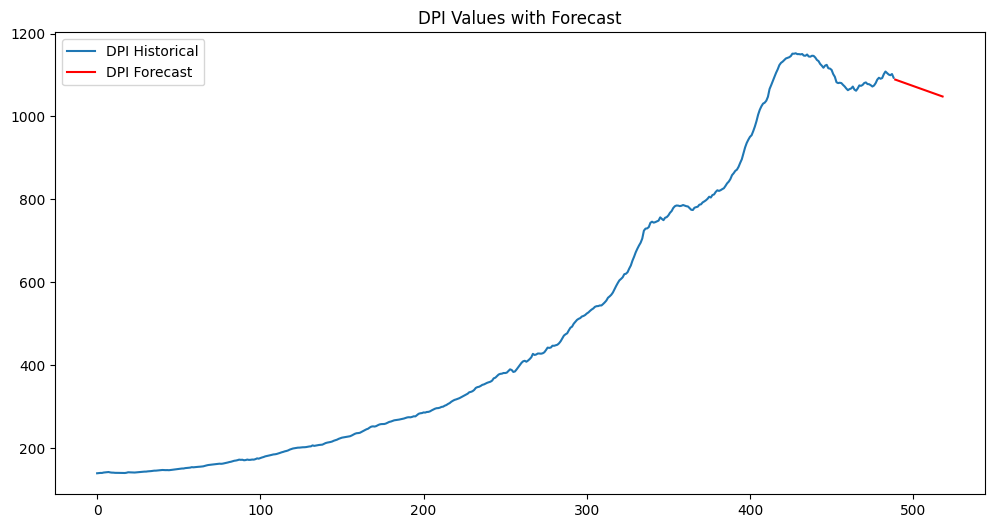

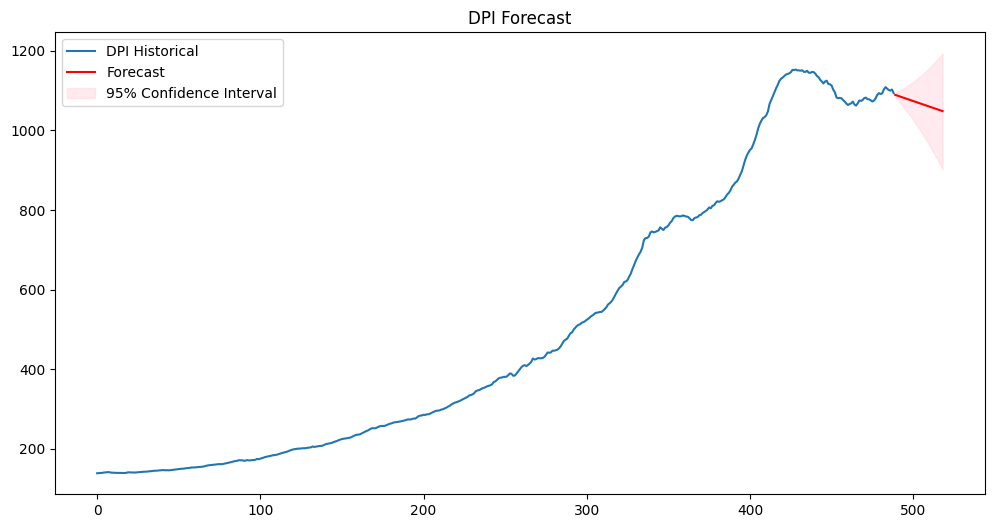


Forecast Interpretation for DPI:
Last observed value: 1093.46
Average forecast value: 1068.54
Forecast change: -24.92
Trend: Downward forecast trend
95% CI range at period 30: [902.93, 1193.36]

DPI Forecast Values (next 5 periods):
489    1088.927785
490    1087.521403
491    1086.115021
492    1084.708640
493    1083.302258
Name: predicted_mean, dtype: float64


In [2]:
# -*- coding: utf-8 -*-
"""DPI ARIMA.ipynb

Automatically generated by Colab.

Original file adapted for DPI only
"""

!pip install statsmodels --upgrade

# Import required libraries
import pandas as pd
import numpy as np
from google.colab import files
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Upload Excel file
print("Please upload DPI Excel file")
dpi_upload = files.upload()
dpi_filename = list(dpi_upload.keys())[0]
dpi_df = pd.read_excel(dpi_filename)

# Print available columns
print("\nDPI DataFrame columns:", list(dpi_df.columns))

# Ask user for the correct column name
close_column = input("Please enter the column name containing DPI values: ")

# Extract DPI values using user-specified column name
try:
    dpi_values = dpi_df[close_column]
except KeyError:
    print(f"Error: Column '{close_column}' not found in the DataFrame")
    print("Please check the column name and try again")
    raise

# Function for unit root tests with interpretation
def unit_root_tests(series, name):
    print(f"\nUnit Root Tests for {name}:")

    # ADF Test
    adf_result = adfuller(series)
    print("ADF Test:")
    print(f'ADF Statistic: {adf_result[0]:.4f}')
    print(f'p-value: {adf_result[1]:.4f}')
    print(f'Critical Values: {adf_result[4]}')
    print("Interpretation:")
    if adf_result[1] < 0.05:
        print(f"  - p-value < 0.05: Reject null hypothesis - {name} is stationary")
    else:
        print(f"  - p-value >= 0.05: Fail to reject null - {name} may be non-stationary")

    # KPSS Test
    kpss_result = kpss(series)
    print("\nKPSS Test:")
    print(f'KPSS Statistic: {kpss_result[0]:.4f}')
    print(f'p-value: {kpss_result[1]:.4f}')
    print(f'Critical Values: {kpss_result[3]}')
    print("Interpretation:")
    if kpss_result[1] < 0.05:
        print(f"  - p-value < 0.05: Reject null hypothesis - {name} is non-stationary")
    else:
        print(f"  - p-value >= 0.05: Fail to reject null - {name} may be stationary")

# Perform unit root tests
unit_root_tests(dpi_values, "DPI")

# Function to find best ARIMA model with interpretation
def find_best_arima(series, name, max_p=3, max_d=2, max_q=3):
    best_aic = float('inf')
    best_order = None

    for p in range(max_p + 1):
        for d in range(max_d + 1):
            for q in range(max_q + 1):
                try:
                    model = ARIMA(series, order=(p, d, q))
                    results = model.fit()
                    if results.aic < best_aic:
                        best_aic = results.aic
                        best_order = (p, d, q)
                except:
                    continue

    print(f"\nBest ARIMA model for {name}:")
    print(f"Order: {best_order}")
    print(f"AIC: {best_aic:.2f}")
    print("Interpretation:")
    print(f"  - p={best_order[0]}: {best_order[0]} autoregressive term(s)")
    print(f"  - d={best_order[1]}: {best_order[1]} difference(s) needed for stationarity")
    print(f"  - q={best_order[2]}: {best_order[2]} moving average term(s)")
    return best_order

# Find and fit best ARIMA model
dpi_order = find_best_arima(dpi_values, "DPI")

# Fit final ARIMA model
dpi_model = ARIMA(dpi_values, order=dpi_order).fit()

# Forecast next 30 periods
forecast_steps = 30
dpi_forecast = dpi_model.forecast(steps=forecast_steps)

# Create forecast index
last_index = len(dpi_values) - 1
forecast_index = range(last_index + 1, last_index + 1 + forecast_steps)

# Plot original series with forecast
plt.figure(figsize=(12,6))
plt.plot(dpi_values, label='DPI Historical')
plt.plot(forecast_index, dpi_forecast, label='DPI Forecast', color='red')
plt.title('DPI Values with Forecast')
plt.legend()
plt.show()

# Detailed forecast plot with confidence intervals and interpretation
def plot_forecast(model, series, name, steps=30):
    forecast_obj = model.get_forecast(steps=steps)
    forecast = forecast_obj.predicted_mean
    conf_int = forecast_obj.conf_int()

    forecast_index = range(len(series), len(series) + steps)

    plt.figure(figsize=(12,6))
    plt.plot(series, label=f'{name} Historical')
    plt.plot(forecast_index, forecast, label='Forecast', color='red')
    plt.fill_between(forecast_index,
                    conf_int.iloc[:, 0],
                    conf_int.iloc[:, 1],
                    color='pink',
                    alpha=0.3,
                    label='95% Confidence Interval')
    plt.title(f'{name} Forecast')
    plt.legend()
    plt.show()

    # Forecast interpretation
    last_value = series.iloc[-1]
    mean_forecast = forecast.mean()
    print(f"\nForecast Interpretation for {name}:")
    print(f"Last observed value: {last_value:.2f}")
    print(f"Average forecast value: {mean_forecast:.2f}")
    print(f"Forecast change: {mean_forecast - last_value:.2f}")
    if mean_forecast > last_value:
        print("Trend: Upward forecast trend")
    elif mean_forecast < last_value:
        print("Trend: Downward forecast trend")
    else:
        print("Trend: Flat forecast trend")
    print(f"95% CI range at period {steps}: [{conf_int.iloc[-1, 0]:.2f}, {conf_int.iloc[-1, 1]:.2f}]")

# Generate detailed forecast plot and interpretation
plot_forecast(dpi_model, dpi_values, "DPI")

# Print forecast values
print("\nDPI Forecast Values (next 5 periods):")
print(dpi_forecast[:5])